In [12]:
import cv2
import numpy as np
from skimage import morphology
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
import os
from tqdm import tqdm_notebook

In [3]:
# This piece of code taken from the original ARCADE repository for this competetion to enhance the contrast

def improve_contrast(source):
    img = source[:,:,0]
    clahe = cv2.createCLAHE(clipLimit =2.0, tileGridSize=(8,8))  
    img_not = cv2.bitwise_not(img)  
    se = np.ones((50,50), np.uint8)  
    wth = morphology.white_tophat(img_not, se)  
    raw_minus_topwhite = img.astype(int) - wth 
    raw_minus_topwhite = ((raw_minus_topwhite>0)*raw_minus_topwhite).astype(np.uint8)  
    img = clahe.apply(raw_minus_topwhite) 
    img = img[:,:,np.newaxis] 
    d3 = np.concatenate([img, img, img], axis=2).astype(np.uint8)

    return d3

C:\Users\prati\AppData\Local\Temp\ipykernel_16780\4208087574.py:8: RuntimeWarning: invalid value encountered in cast
  raw_minus_topwhite = ((raw_minus_topwhite>0)*raw_minus_topwhite).astype(np.uint8)


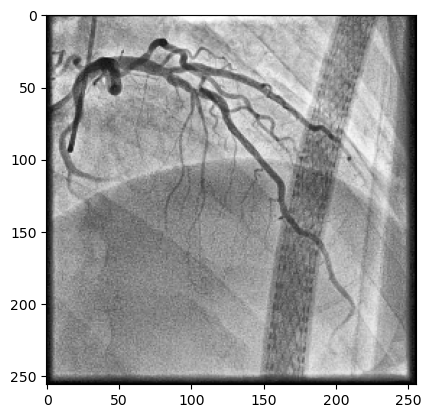

In [10]:
img = tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img("../data/processed/train/images/400.png", 
                                                    color_mode='grayscale', 
                                                    target_size=(256,256)))
img = improve_contrast(img)
plt.imshow(img)

In [13]:
train_files = glob("../data/processed/train/images/*")
test_files = glob("../data/processed/test/images/*")
val_files = glob("../data/processed/val/images/*")

In [15]:
default_path = "../data/contrastprocessed/"

for file in tqdm_notebook(train_files):
    img = tf.keras.preprocessing.image.load_img(file, color_mode='grayscale', target_size=(512,512))
    img = tf.keras.preprocessing.image.img_to_array(img)
    
    img = improve_contrast(img)
    
    path = os.path.join(default_path, "train/images",file.split("\\")[-1])
    
    img = tf.keras.preprocessing.image.save_img(path, img)
    
for file in tqdm_notebook(test_files):
    img = tf.keras.preprocessing.image.load_img(file, color_mode='grayscale', target_size=(512,512))
    img = tf.keras.preprocessing.image.img_to_array(img)
    
    img = improve_contrast(img)
    
    path = os.path.join(default_path, "test/images", file.split("\\")[-1])
    
    img = tf.keras.preprocessing.image.save_img(path, img)
    
for file in tqdm_notebook(val_files):
    
    img = tf.keras.preprocessing.image.load_img(file, color_mode='grayscale', target_size=(512,512))
    img = tf.keras.preprocessing.image.img_to_array(img)
    
    img = improve_contrast(img)
    
    path = os.path.join(default_path, "val/images", file.split("\\")[-1])
    
    img = tf.keras.preprocessing.image.save_img(path, img)

C:\Users\prati\AppData\Local\Temp\ipykernel_16780\2973668856.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm_notebook(train_files):


  0%|          | 0/997 [00:00<?, ?it/s]

C:\Users\prati\AppData\Local\Temp\ipykernel_16780\4208087574.py:8: RuntimeWarning: invalid value encountered in cast
  raw_minus_topwhite = ((raw_minus_topwhite>0)*raw_minus_topwhite).astype(np.uint8)
C:\Users\prati\AppData\Local\Temp\ipykernel_16780\2973668856.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm_notebook(test_files):


  0%|          | 0/300 [00:00<?, ?it/s]

C:\Users\prati\AppData\Local\Temp\ipykernel_16780\2973668856.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm_notebook(val_files):


  0%|          | 0/200 [00:00<?, ?it/s]